## clustering the colors of an image with KMeans algorithm

In [289]:
import cv2 as cv
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import pandas as pd
from tqdm.notebook import tqdm
import pickle 

**Read and show the image**

In [213]:
img = cv.imread('Four_color_world_map.png')
img_RGB = cv.cvtColor(img,  cv.COLOR_BGR2RGB)

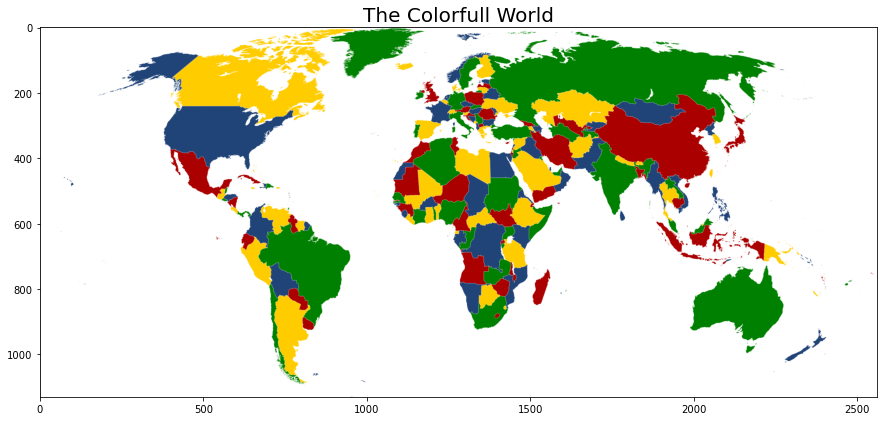

In [214]:
plt.figure(figsize=(15,10))
plt.imshow(img_RGB)
plt.title("The Colorfull World", size=20);

**Convert the `BGR` channel to `HSV`**

In [254]:
img_HSV = cv.cvtColor(img,  cv.COLOR_BGR2HSV)
img_HSV.shape

(1130, 2560, 3)

In [255]:
img_hue = img_HSV[:, :, 0]
img_hue.shape

(1130, 2560)

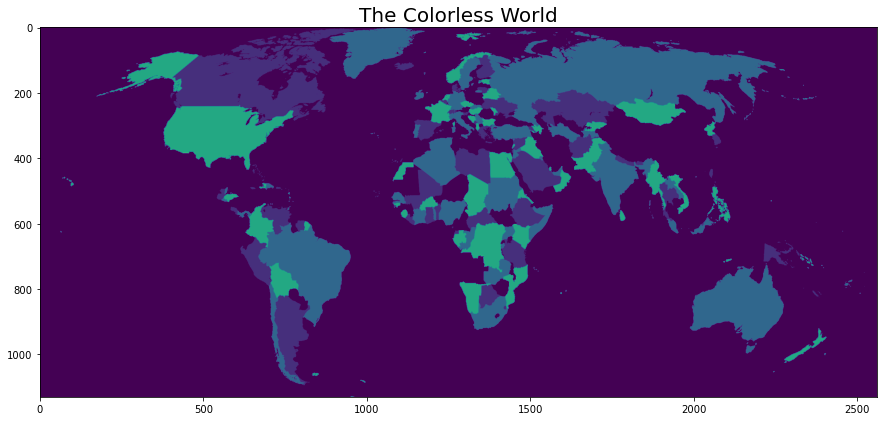

In [256]:
plt.figure(figsize=(15,10))
plt.imshow(img_hue)
plt.title("The Colorless World", size=20);

**preprocessing `normalize` and `feature scaling`**

In [290]:
img_normal = MinMaxScaler(feature_range=(0, 1))
img_normal = img_normal.fit_transform(img_hue.reshape(-1, 1))

**Training the model with `KMeans(n_clusters=4)` estimator**

In [258]:
km = KMeans(n_clusters=4)
km = km.fit(img_normal)

**Create a empty numpy ndarray for transforming prediction group number to the colores code.**

In [259]:
img_km = np.empty(img_RGB.shape)

In [260]:
colors = {
    'red': (1, 0, 0),
    'white': (1, 1, 1),
    'blue': (0, 0, 1),
    'green': (0, 1, 0),
    'yellow':(1, 1 , 0)
    }

def set_color(pixel):
    color_prediction = km.predict([img_normal[pixel]])[0]
    
    row = pixel//2560
    col = pixel-((row) * 2560)
    
    if color_prediction == 0:
        img_km[row, col, :] = colors['white']
    elif color_prediction == 1:
        img_km[row, col, :] = colors['red']
    elif color_prediction == 2:
        img_km[row, col, :] = colors['blue']
    else :
        img_km[row, col, :] = colors['green']


In [261]:
for p in tqdm(range(2892800)):
        set_color(p)

  0%|          | 0/2892800 [00:00<?, ?it/s]

**Compare `Original` image with the `Clustered image`**

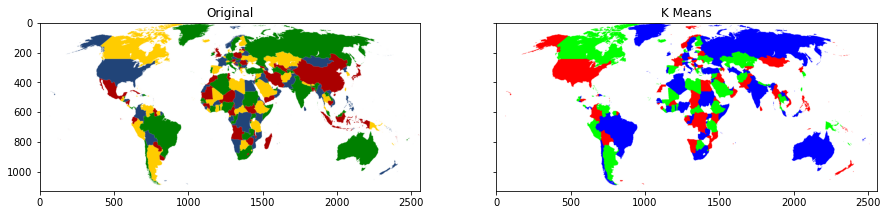

In [294]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True,figsize=(15,10))
ax1.set_title("Original")
ax1.imshow(img_RGB)
ax2.set_title('K Means')
ax2.imshow(img_km);

**Finde the best value `n_clusters` hyperparameter**

  0%|          | 0/14 [00:00<?, ?it/s]

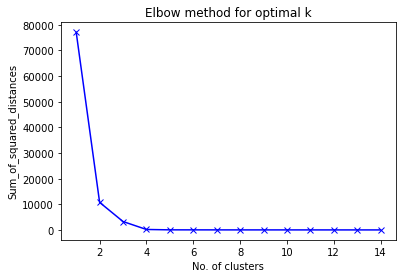

In [267]:
from sklearn.cluster import KMeans

ks = range(1, 15)
#sum_of_squared_distances = []
for k in tqdm(ks):
    km = KMeans(n_clusters=k)
    km = km.fit(img_normal)
    sum_of_squared_distances.append(km.inertia_)
plt.plot(ks, sum_of_squared_distances, 'bx-')
plt.title('Elbow method for optimal k')
plt.xlabel('No. of clusters')
plt.ylabel('Sum_of_squared_distances')
plt.show()

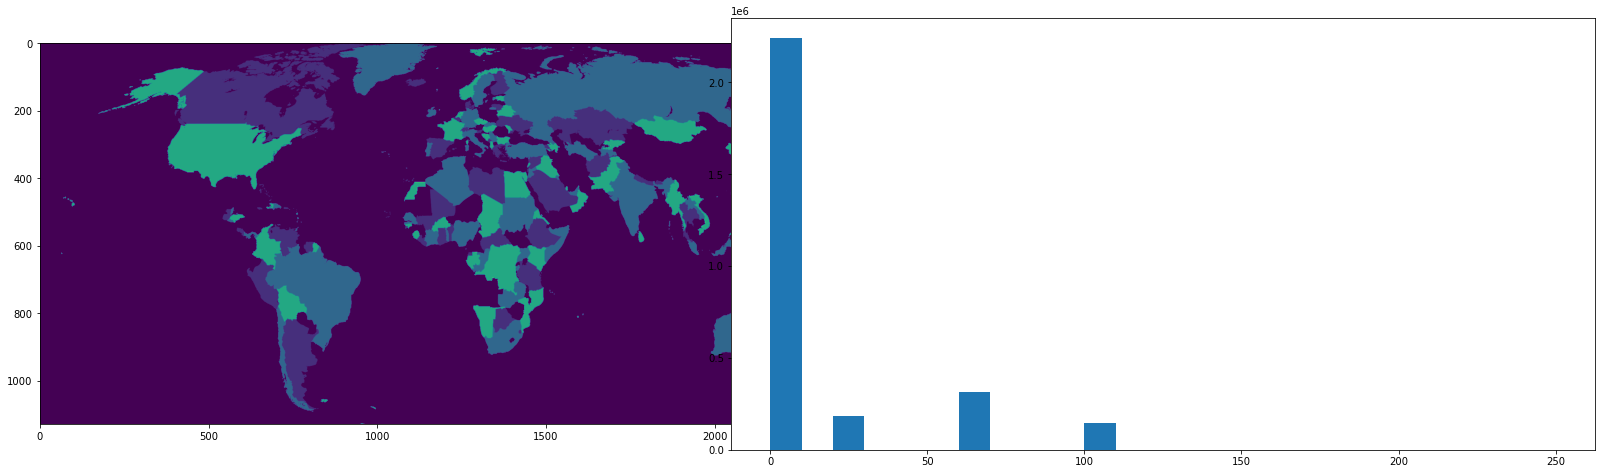

In [288]:
fig = plt.figure(figsize=(12,3))
ax1 = fig.add_axes([0.1,5,1,2])
ax2 = fig.add_axes([0.9,5,1,2])
ax1.imshow(img_hue)
ax2.hist(np.ravel(img_hue), bins=np.arange(0,256, 10));

**Save `trained model` and all other important files.**

In [293]:
dict_files = {
    'sum_of_squared_distances':sum_of_squared_distances,
    'image_KMeans': img_km,
    'trianed_model': km
        }

with open('files.pkl', 'wb') as pkl_file:
    pickle.dump(dict_files, pkl_file)